# Top 10 Cryptocurrency analysis with Web Scraping

## Install libraries

In [4]:
pip install requests
pip install beautifulsoup4

# Install only if you don´t have them install.


Note: you may need to restart the kernel to use updated packages.


## Import libraries

In [1]:
import requests
from bs4 import BeautifulSoup


## Request for getting information from the web site

In [2]:
pagina_web=requests.get("https://coinmarketcap.com/es/coins/")

print(pagina_web)

# If the message gotten is 'Response [200] so you can get information from de web site'


<Response [200]>


## Getting HTML code

<!DOCTYPE html>
<html dir="ltr" lang="es">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no, shrink-to-fit=no" name="viewport"/>
  <script>
   (function() {var isInApp = navigator.userAgent.match(/CMCApp/i);if (!isInApp && !window.oneTrustScriptLoad) {window.oneTrustScriptLoad = true;document.write('<scr'+'ipt src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js" type="text/javascript" charset="UTF-8" data-domain-script="13729615-a271-4a5f-8eae-0c058b458464"></sc'+'ript><scr'+'ipt type="text/javascript"> function OptanonWrapper() {} </sc'+'ript>');}
})()
  </script>
  <script>
   (function() {if (false) {window.__renderTime__.csrRender = 1696726453266;return;}window.__renderTime__ = {"pageInitStart":1696726453244,"pageInitEnd":1696726453259,"pageRender":1696726453266};window.__renderTime__.pageLoad = Date.now();})()
  </script>
  <script>
   (function
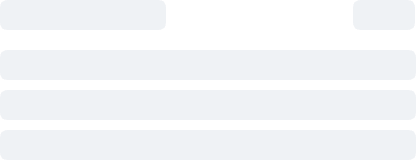

In [3]:
soup=BeautifulSoup(pagina_web.text,'html.parser')  # Getting HTML code

print(soup.prettify())                             # Printing HTML code


## Getting information of the cryptocurrency

### Name

In [4]:
coins = []

name_items=soup.find_all('p', class_='sc-4984dd93-0 kKpPOn')

for item in name_items:
    coin=item.text.strip()
    coins.append(coin)

coins



['Bitcoin',
 'Ethereum',
 'Tether USDt',
 'BNB',
 'XRP',
 'USDC',
 'Solana',
 'Cardano',
 'Dogecoin',
 'TRON']

### Price

In [5]:
prices = []

divs = soup.find_all('div', class_='sc-a0353bbc-0 gDrtaY')

for div in divs[:10]:
    span = div.find('span')
    if span:
        price = span.text.strip()
        price = price[1:]
        price=price.replace(',','')
        final_price=float(price)
        prices.append(final_price)

prices


[27989.4,
 1638.25,
 1.0,
 212.51,
 0.5229,
 0.9999,
 23.36,
 0.2588,
 0.06155,
 0.08832]

### Getting current prices, capacities of market and volumes in the last 24 hours

In [6]:
elements = soup.find_all('td', style='text-align:end')

values=[0]

prices=[]
capacities=[]
volumes=[]

for item in elements:

    content = item.get_text(strip=True)

    if content.startswith('$'):
        content=content[1:]
        content=content.replace(',','')
        values.append(content)


for i, element in enumerate(values):
    if i%3==0:
        if i>0:
            element=element[:-4]
        volumes.append(int(element))
    elif i%3==1:
        prices.append(float(element))
    else:
        cadena=element.split('$')
        element=cadena[1]
        capacities.append(element)

print(volumes)
print(capacities)
print(prices)



[0, 6323224444225915, 25384317091549838, 1075586391910750208355, 208332375980683, 317736411607673169, 11471532271147207871, 27321803811695261, 116460574450051454, 947187421538968545, 1340809821518061890]
['545992900793', '196946897843', '83518357108', '32682383310', '27914823079', '25533653788', '9677205162', '9095442089', '8697831550', '7861423338']
[27989.4, 1638.25, 1.0, 212.51, 0.5229, 0.9999, 23.36, 0.2588, 0.06155, 0.08832]


### Getting change in the price in last 24 hours

In [11]:
changes=[]

elements = soup.find_all('td', style='text-align:end')

history=[]
i=0
array = [1, 4, 7, 10, 13, 16, 19, 22, 25, 28]

for change in elements:

    content=str(change)

    if content.startswith('<td style="text-align:end"><span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down"'):
        content = change.get_text(strip=True)
        if content.endswith('%'):
            number = -float(content[:-1])
            if i in array:
                history.append(number)
                i=i+1
            else:
                i=i+1
    elif content.startswith('<td style="text-align:end"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up"'):
        content = change.get_text(strip=True)
        if content.endswith('%'):
            number = float(content[:-1])
            if i in array:
                history.append(number)
                i=i+1
            else:
                i=i+1

history


[0.25, -0.48, 0.01, -0.57, -0.43, -0.0, -1.21, -2.52, -0.06, 0.83]